In [181]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, tukey_hsd
import numpy as np
import statsmodels.api as sm
from scipy import stats

## I. Data Preprocessing

In [102]:
# Creating pandas dataframe of the Spotify dataset.
spotify_df = pd.read_csv('dataset.csv')
spotify_df = spotify_df.drop(columns='Unnamed: 0')
spotify_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [103]:
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Let's learn more about the data! How many samples, features, data types, etc...

In [104]:
print('Number of samples:', spotify_df.shape[0])
print('Number of features:', spotify_df.shape[1])

print(f'Category Data Types:\n{spotify_df.dtypes}')

# Creating a list with all category names.
categories = spotify_df.columns.tolist()[1:]
print("Categories:", categories)

Number of samples: 114000
Number of features: 20
Category Data Types:
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object
Categories: ['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


Now let's look if there are any missing values!

In [105]:
missing_data = spotify_df.isna().sum()
print(missing_data)

# Saving missing values as dictionary as missing values for each category.
missing_data = missing_data.to_dict()


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [106]:
# Just making sure the count is the same for each column
spotify_df.count()

track_id            114000
artists             113999
album_name          113999
track_name          113999
popularity          114000
duration_ms         114000
explicit            114000
danceability        114000
energy              114000
key                 114000
loudness            114000
mode                114000
speechiness         114000
acousticness        114000
instrumentalness    114000
liveness            114000
valence             114000
tempo               114000
time_signature      114000
track_genre         114000
dtype: int64

Looks like there is 1 missing value each in the artists, album_name, and track_name categories. Since <br> the proportion of missing data is <5% we can use Listwise Deletion to get rid of the missing values.

In [107]:
# Dropping the row with NA values in the dataframe.
spotify_df = spotify_df.dropna()

Now check for duplicate values in the dataset.

In [ ]:
duplicates = spotify_df[spotify_df.duplicated()]
len(duplicates)

450

Looks like there are 450 rows with exact duplicates in the dataset that need to be removed.

In [164]:
spotify_df['track_id'].duplicated(keep=False).sum()

40900

In [165]:
duplicated_ids = spotify_df['track_id'].value_counts()
duplicated_ids = duplicated_ids[duplicated_ids > 1]
duplicated_ids

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
08kTa3SL9sV6Iy8KLKtGql    7
4XYieGKSlJlHpzB3bl6WMP    7
                         ..
2K6jJQ1i2SVNWLEF06Ha4B    2
0hjpo40L9XPirSdaJZOGB2    2
40XeGNGFchGYw7y0ue1GiG    2
50xwQXPtfNZFKFeZ0XePWc    2
6NDoBIaqTHdcudaR8RDJNw    2
Name: count, Length: 16641, dtype: int64

Digging further it can be seen that there are 16,641 tracks that are listed multiple times in the dataset since they fall under multiple genres. This information can come in handy later during model creation.

In [166]:
# Removing the exact duplicates from the dataset
spotify_df = spotify_df.drop_duplicates()
spotify_df.duplicated().sum()

0

The category, track_genre, is currently a string (object) describing what the genre of the particular song is. <br> We need to convert this to numeric values through feature encoding for our model to use later on.

In [167]:
# Checking cardinality to see what type of encoding would best fit this scenario.
print(spotify_df['track_genre'].nunique())

114


Since this category has a high cardinality, one hot encoding would create too many new columns. <br> Let's try using frequency encoding here to convert this column.

In [111]:
freq_encoding = spotify_df['track_genre'].value_counts()
spotify_df['track_genre_freq'] = spotify_df['track_genre'].map(freq_encoding)
spotify_df

C:\Users\mail2\AppData\Local\Temp\ipykernel_35272\4059834931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['track_genre_freq'] = spotify_df['track_genre'].map(freq_encoding)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1000
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1000
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1000
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1000
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,1000
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,1000
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,1000
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,1000


In [112]:
spotify_df['track_genre_freq'].unique()

array([1000,  999], dtype=int64)

Looks like frequency encoding might not be the best option since looks the frequency of the genres are 999 or 1000 which loses much of the uniqueness and information we are looking for from this category. Another good option for encoding when there is high cardinality is Target/Mean Encoding, let's try that!

In [113]:
genre_popularity_map = spotify_df.groupby('track_genre')['popularity'].mean()
spotify_df['track_genre_target_enc'] = spotify_df['track_genre'].map(genre_popularity_map)
print('No. Unique Values: ', spotify_df['track_genre_target_enc'].nunique())
spotify_df

No. Unique Values:  113


C:\Users\mail2\AppData\Local\Temp\ipykernel_35272\3424358385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['track_genre_target_enc'] = spotify_df['track_genre'].map(genre_popularity_map)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,track_genre_target_enc
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1000,42.483
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1000,42.483
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1000,42.483
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1000,42.483
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1000,42.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,1000,41.873
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,1000,41.873
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,1000,41.873
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,1000,41.873


## II. Exploratory Data Analysis

### 🎯 Q1: Correlations
We will start our analysis by determining how each feature is related to each other. To do this, we will create a plot of the correlations between each numerical feature. 

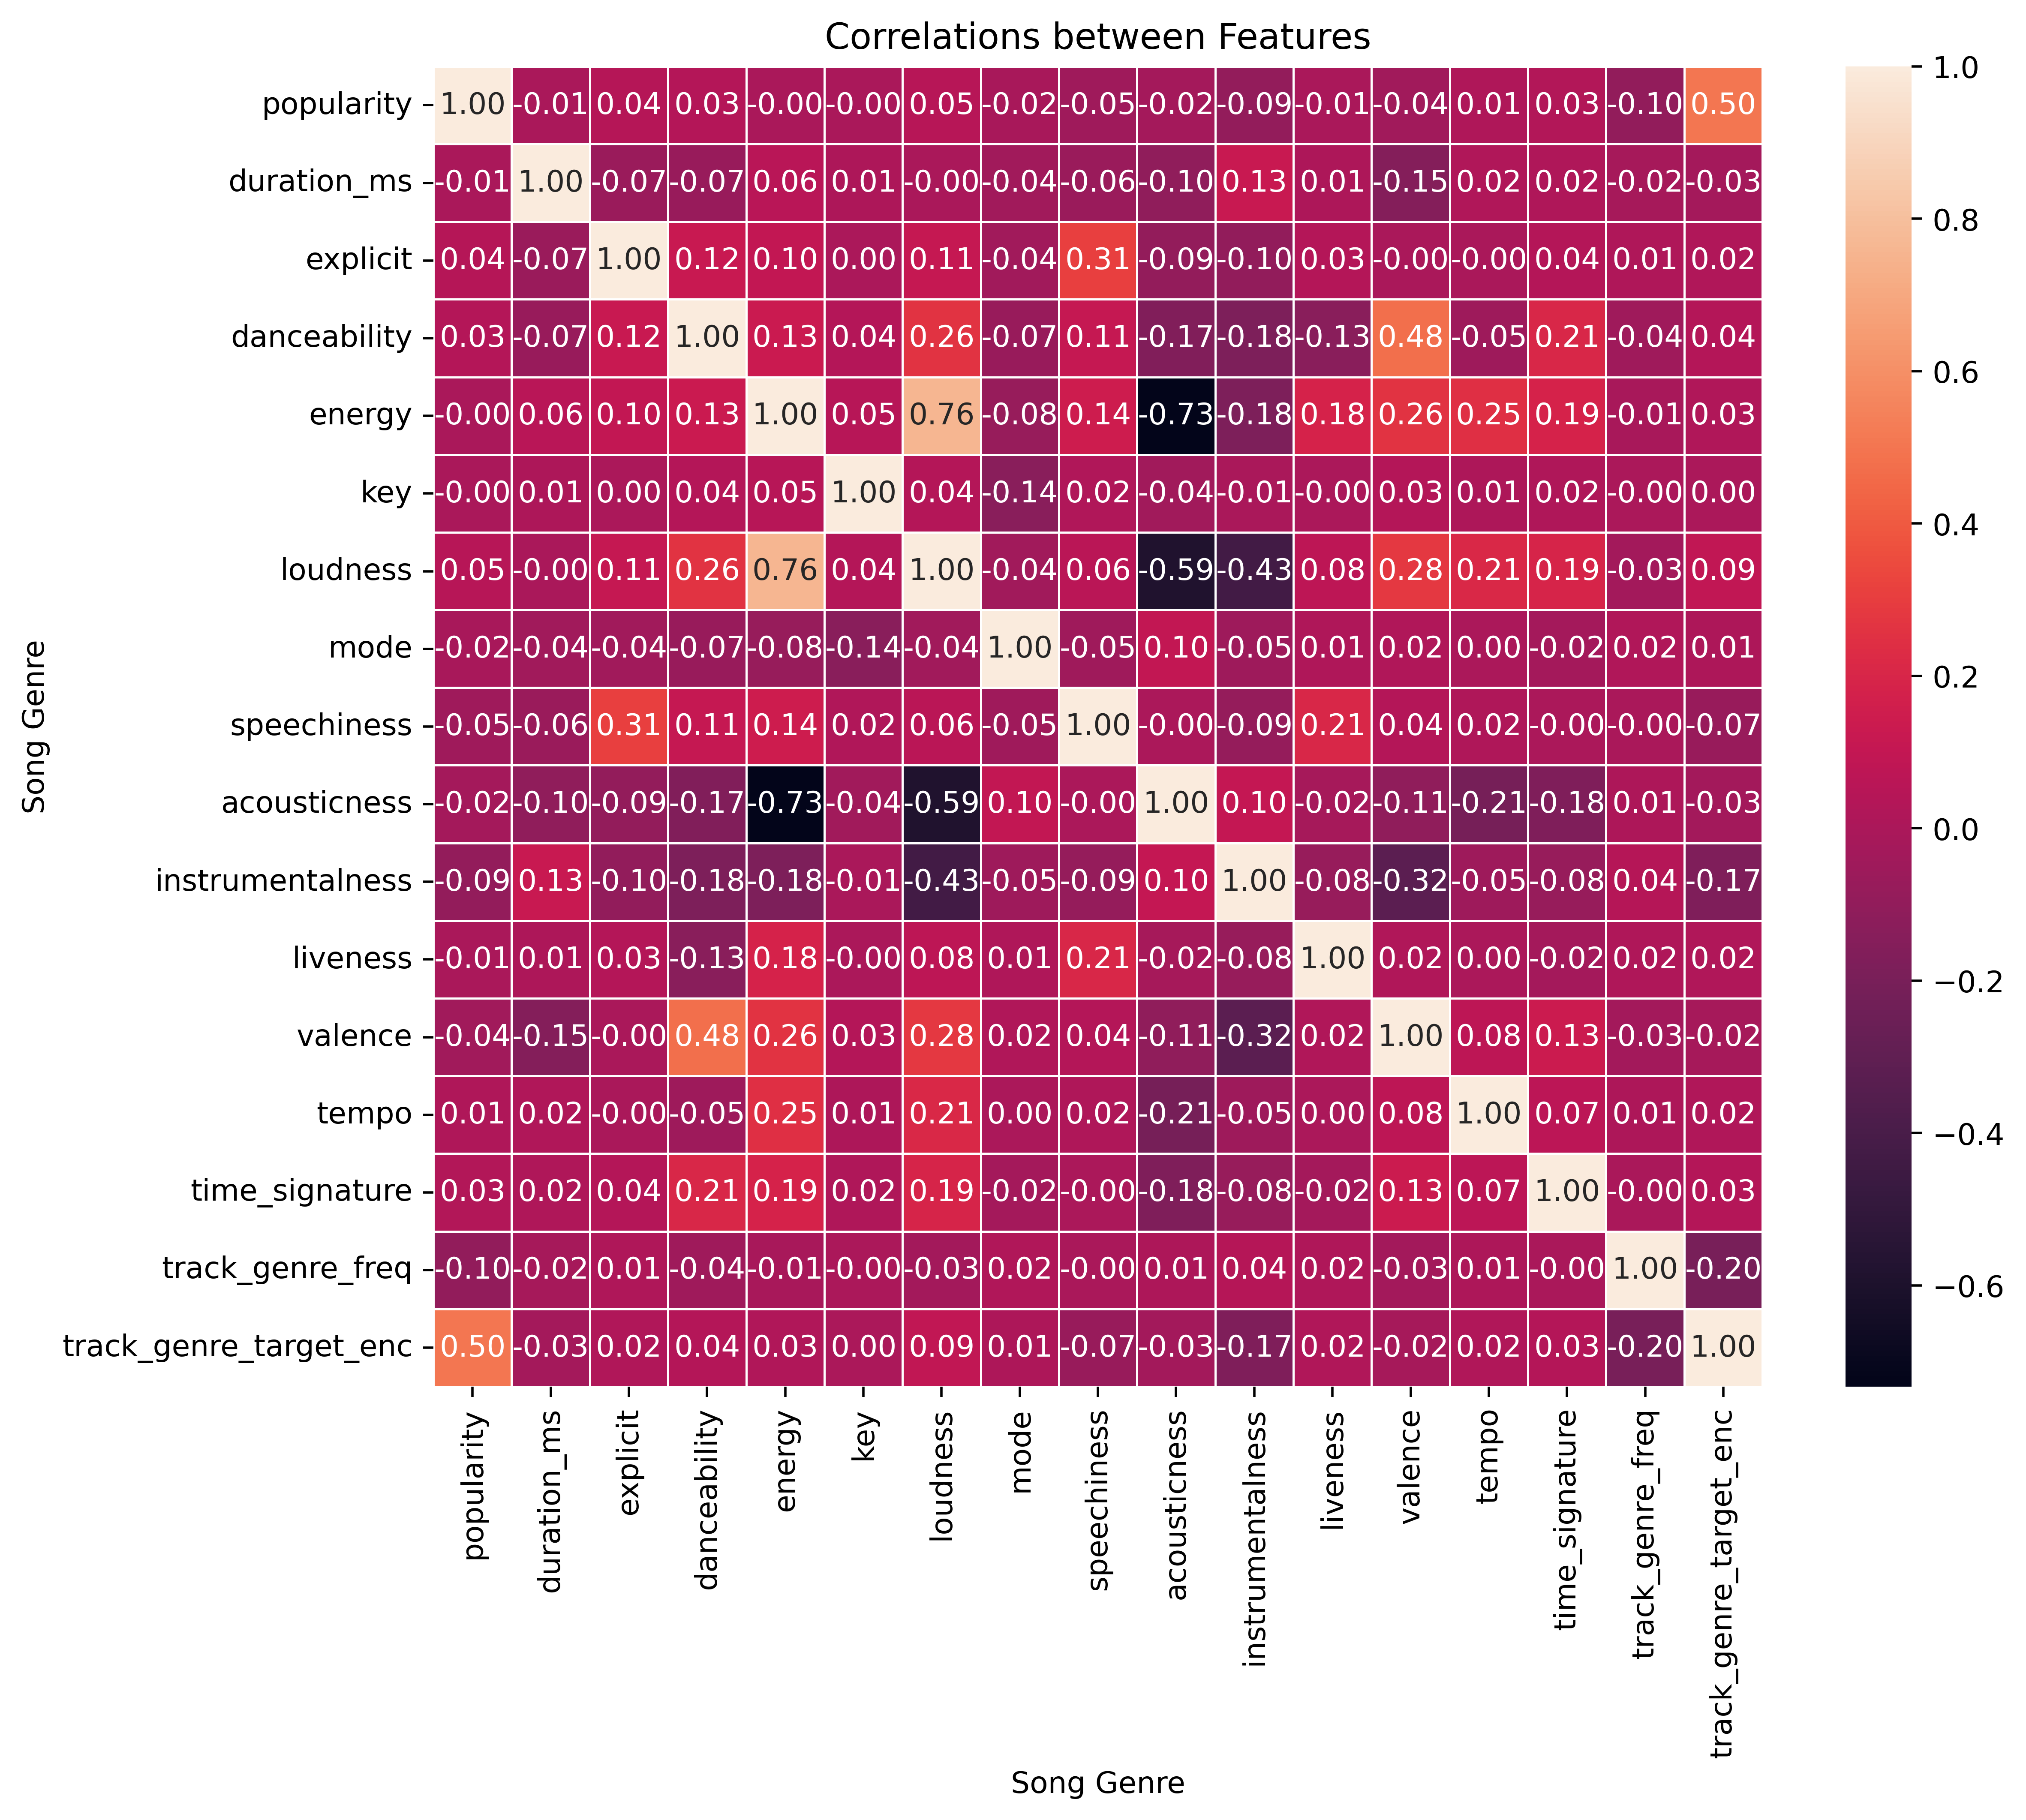

In [171]:
corr = spotify_df.corr(method = 'pearson', numeric_only= True)
plt.figure(figsize=(10,8), dpi =500)
plt.title("Correlations between Features")
ax = sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
ax.set_xlabel("Song Genre")
ax.set_ylabel("Song Genre")
plt.show()

We can see from the above plot that some features are more correlated, such as acousticness and energy, as well as acousticness and loudness. However, most features are not highly correlated. This is easier to see when we plot the absolute value of the correlation.

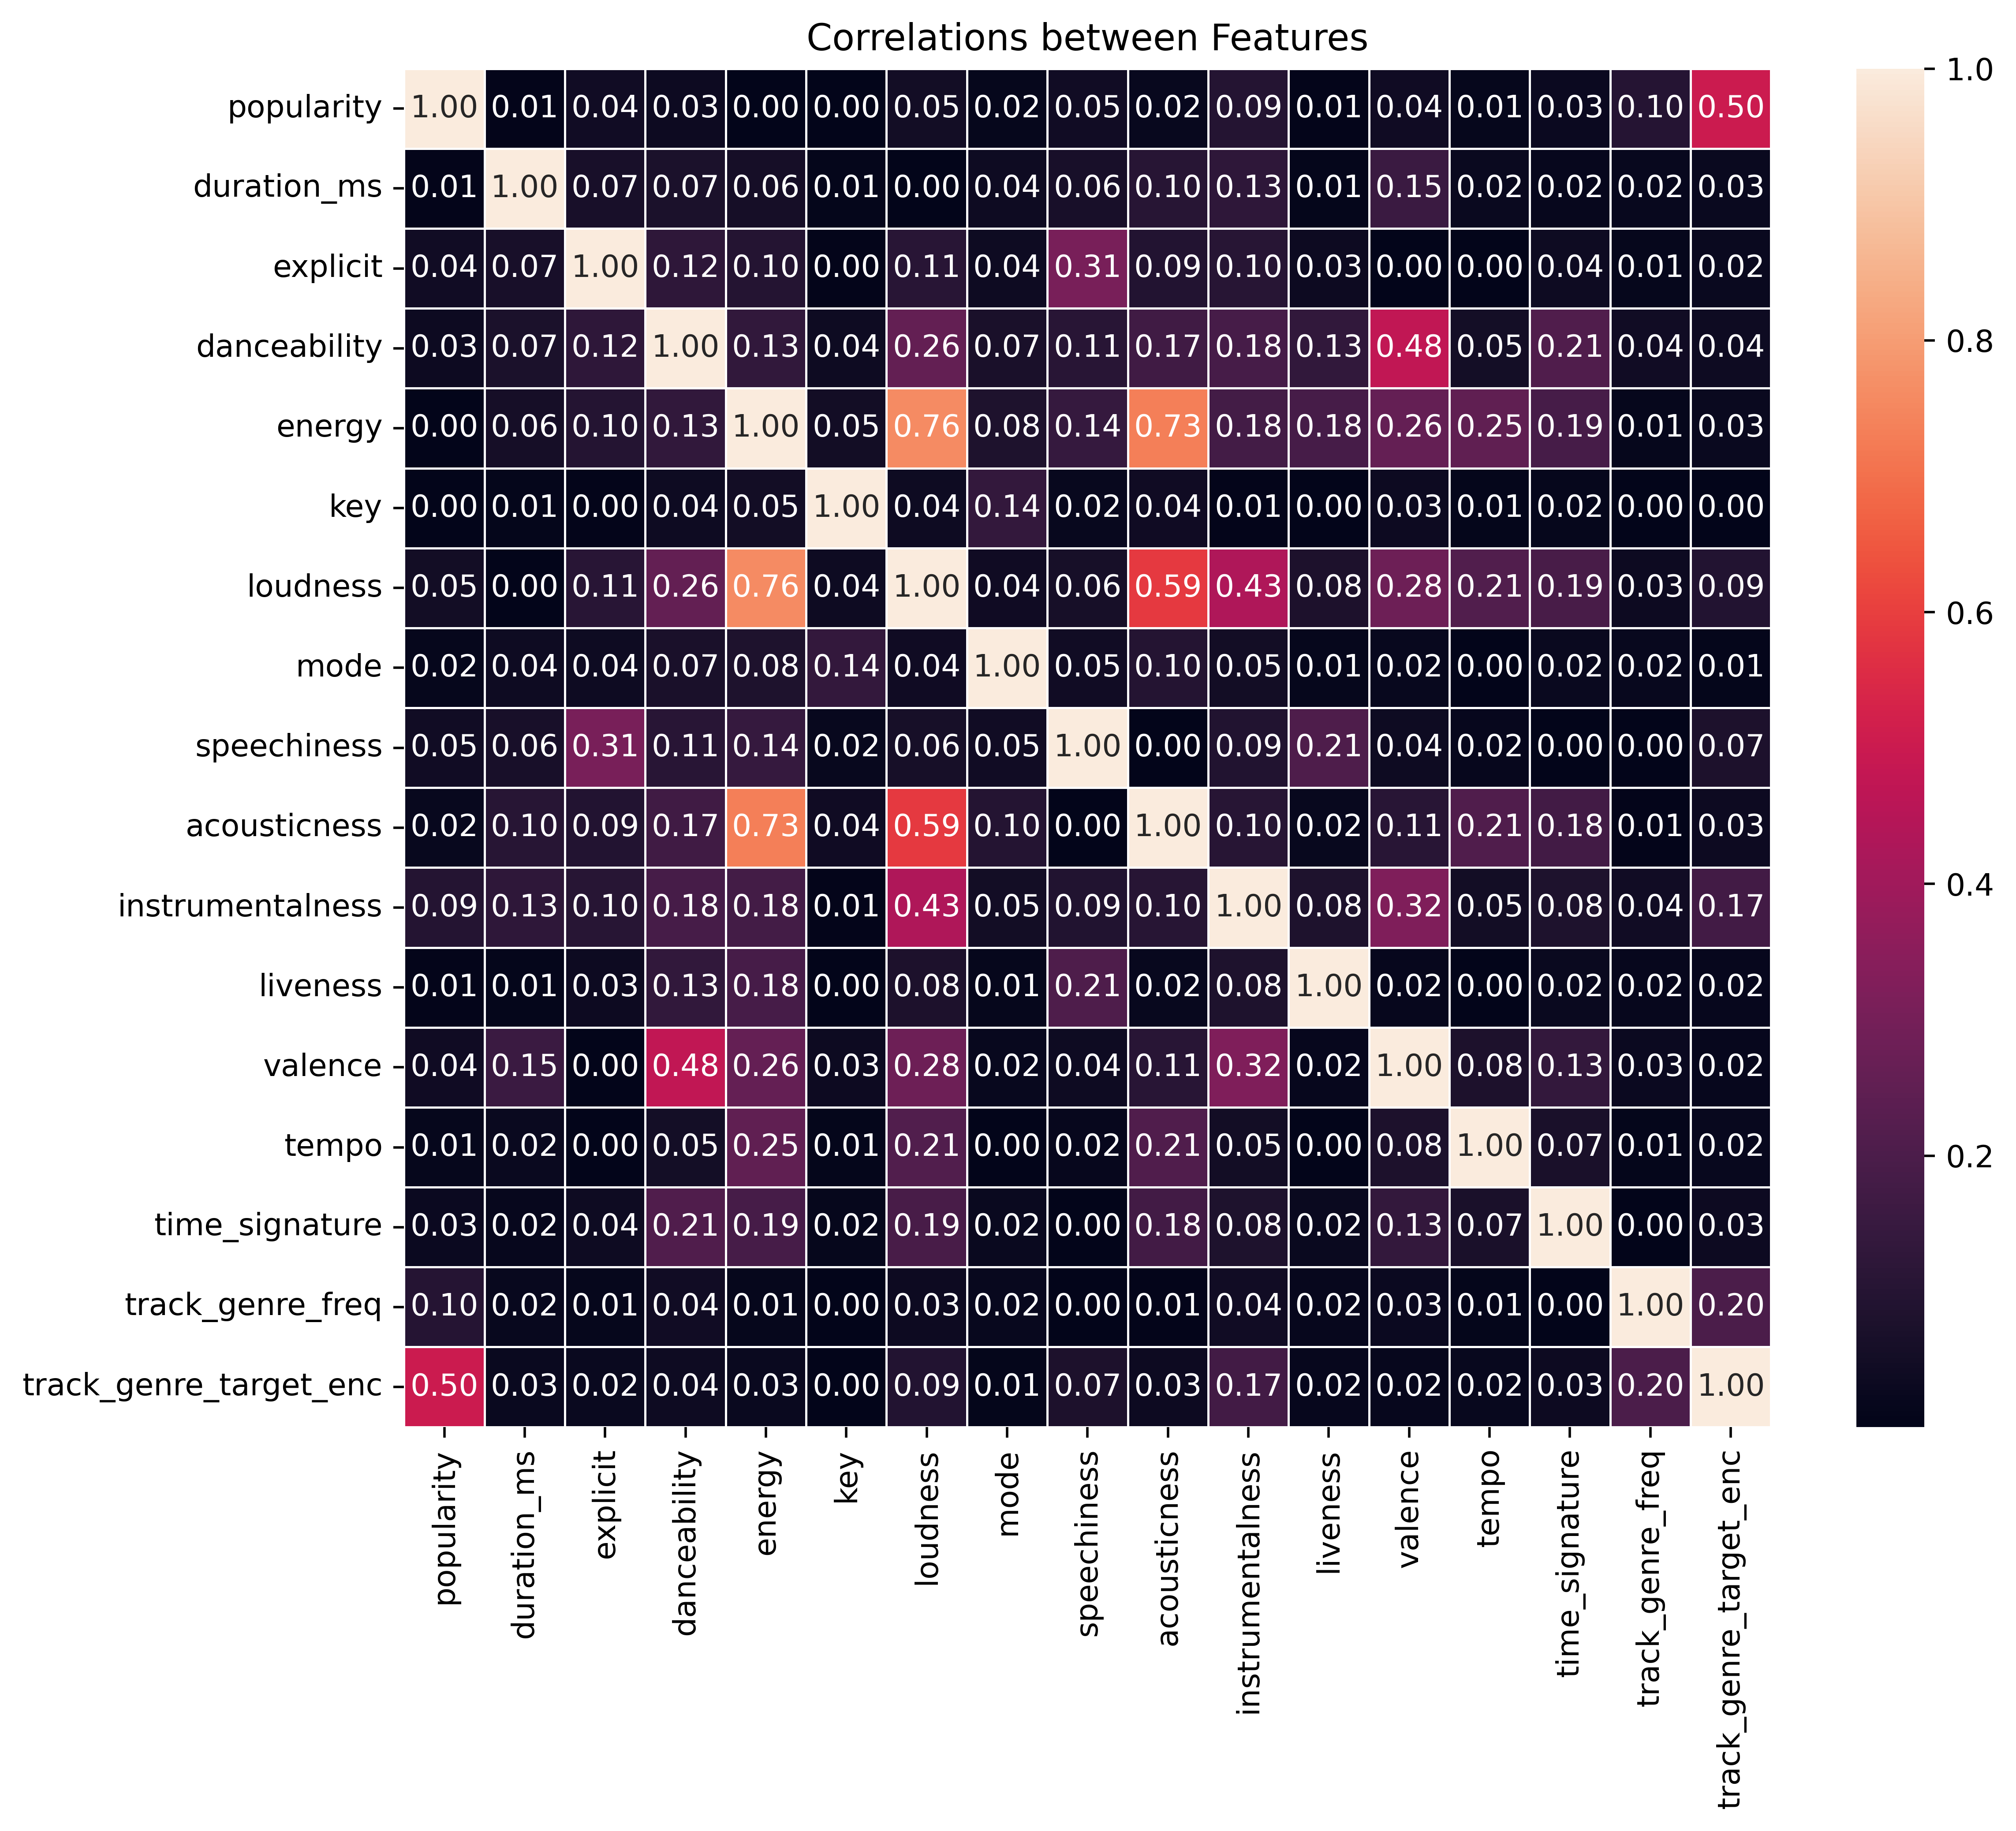

In [169]:
plt.figure(figsize=(10,8), dpi =500)
plt.title("Correlations between Features")
sns.heatmap(corr.abs(),annot=True,fmt=".2f", linewidth=.5)
plt.show()

Most of the pairs of features have absolute correlation less than 0.1. To expand on this, let's find out which features are most correlated to which.

In [170]:
pairs = list()
for column in corr.columns:
    related_feature = corr[column].abs().sort_values(ascending= False).iloc[[1]].index.array[0]
    pairs.append([column, related_feature])
    print(column, " is most correlated with ", related_feature)

popularity  is most correlated with  track_genre_target_enc
duration_ms  is most correlated with  valence
explicit  is most correlated with  speechiness
danceability  is most correlated with  valence
energy  is most correlated with  loudness
key  is most correlated with  mode
loudness  is most correlated with  energy
mode  is most correlated with  key
speechiness  is most correlated with  explicit
acousticness  is most correlated with  energy
instrumentalness  is most correlated with  loudness
liveness  is most correlated with  speechiness
valence  is most correlated with  danceability
tempo  is most correlated with  energy
time_signature  is most correlated with  danceability
track_genre_freq  is most correlated with  track_genre_target_enc
track_genre_target_enc  is most correlated with  popularity


Some interesting points come from this: 
- the duration of a song tends to be longer when the valence ("musical positiveness") is lower,
- in contrast the danceability tends to be higher when the valence is higher,
- energy (intensity) is highly correlated with loudness and acousticness,
- the tempo tends to be faster when the energy is higher.

Above all however, is that popularity is not highly correlated with any feature except for potentially track genre.

### 🎯 Q2: Is popularity related to genre/key?
🔬 Statistical Method: One-way ANOVA (Analysis of Variance)

In [95]:
# Create a list of popularity scores per genre
genre_groups = [group['popularity'].values for name, group in spotify_df.groupby('track_genre')]

F = f_oneway(*genre_groups)
print("P-Value received from the ANOVA-testing", F.pvalue)

P-Value received from the ANOVA-testing 0.0


This p-value tells us that there is there is strong evidence that at *least one genre* has a different mean popularity compared to the others since it is <0.05

From doing the ANOVA test, we can only learn that there is a significant difference between the means of the groups included. Now to find out which one of these groups differ, we must do a Post Hoc Test such as Tukey's Honest Significant Difference (HSD). Here I will do the HSD test on the 10 most popular genre's since doing this test on 114 genres will become overwhelming.

In [126]:
# Find top 10 genres by mean popularity
top_10_popular_genres = (
    spotify_df.groupby('track_genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter dataframe
df_top10 = spotify_df[spotify_df['track_genre'].isin(top_10_popular_genres)]

In [ ]:
# Convert popularity values into a list per genre
groups = [df_top10[df_top10['track_genre'] == genre]['popularity'].values
          for genre in top_10_popular_genres]

# Run Tukey HSD
res = tukey_hsd(*groups)

We are going to make the result of the HSD into a pandas dataframe to make it easier to view.

In [133]:
genre_list = list(top_10_popular_genres)

comparisons = []
for (i, j), stat in np.ndenumerate(res.statistic):
    if i < j:
        comparisons.append({
            'Genre A': genre_list[i],
            'Genre B': genre_list[j],
            'Mean Diff': stat,
            'p-value': res.pvalue[i, j],
            'Lower CI': res.confidence_interval().low[i, j],
            'Upper CI': res.confidence_interval().high[i, j],
            'Significant': res.pvalue[i, j] < 0.05
        })

# Convert to DataFrame
tukey_df = pd.DataFrame(comparisons)

In [135]:
tukey_df =  tukey_df.sort_values(by='p-value')
tukey_df

,Genre A,Genre B,Mean Diff,p-value,Lower CI,Upper CI,Significant
13,k-pop,anime,8.180953,3.138823e-12,5.796074,10.565832,True
2,pop-film,sad,6.904000,3.138823e-12,4.519717,9.288283,True
3,pop-film,grunge,9.689000,3.138823e-12,7.304717,12.073283,True
4,pop-film,indian,9.744000,3.138823e-12,7.359717,12.128283,True
5,pop-film,anime,10.511000,3.138823e-12,8.126717,12.895283,True
6,pop-film,emo,11.155000,3.138823e-12,8.770717,13.539283,True
7,pop-film,sertanejo,11.417000,3.138823e-12,9.032717,13.801283,True
8,pop-film,pop,11.707000,3.138823e-12,9.322717,14.091283,True
16,k-pop,pop,9.376953,3.138823e-12,6.992074,11.761832,True
15,k-pop,sertanejo,9.086953,3.138823e-12,6.702074,11.471832,True


From this result of the HSD test and it's table, you can see that the categories **pop-film, film, and chill** were the majority of the *significant difference* when comparisons where made between genres. This suggests that pop-film, k-pop, and chill are are significantly more popular than emo, anime, indian, grunge, sertanejo, sad, and pop as the **conclusion**.

Below I've plotted the Top 10 Most Popular Genres to show that this relationship found can also be seen from a simple averaging of popularity scores on the track_genres.

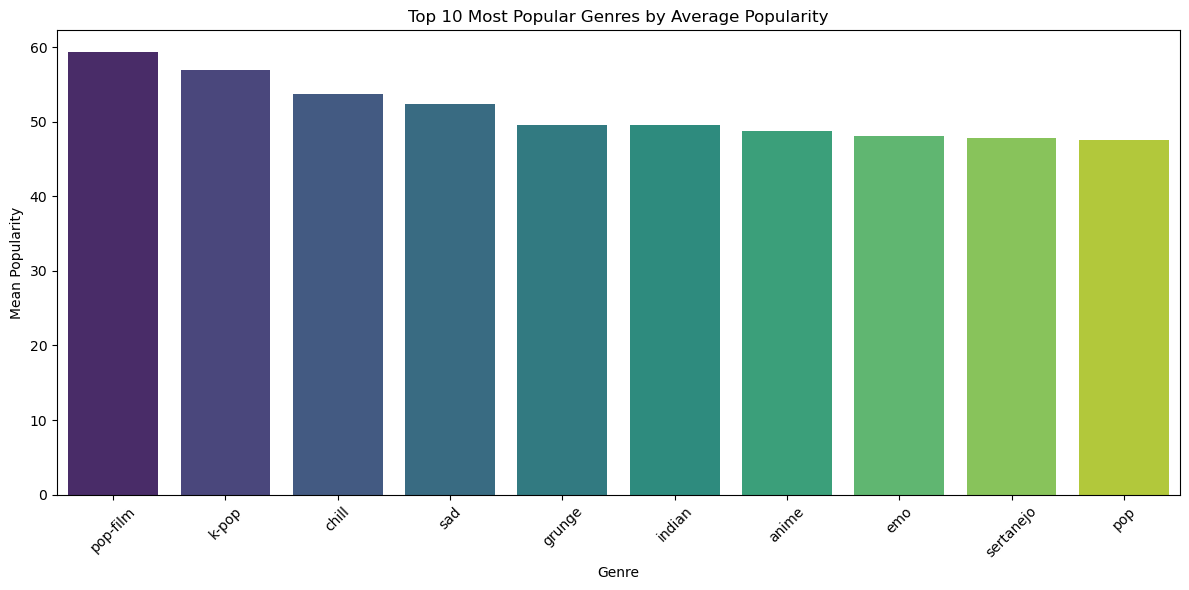

In [127]:
# Compute mean popularity
mean_popularity = df_top10.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette="viridis")
plt.title('Top 10 Most Popular Genres by Average Popularity')
plt.ylabel('Mean Popularity')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🎯 Q3: Are songs in a major key more popular than songs in a minor key? how about explicit vs non-explicit?

In [172]:
spotify_df.head()["key"]

0    1
1    1
2    0
3    0
4    2
Name: key, dtype: int64

In [173]:
songs_in_minor_keys = spotify_df[spotify_df["mode"] == 0]
songs_in_major_keys = spotify_df[spotify_df["mode"] == 1]

In [174]:
songs_in_minor_keys.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,track_genre_target_enc
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1000,42.483
12,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,Solo,52,198712,False,0.489,0.3140,7,...,0.0331,0.7490,0.000000,0.1130,0.607,124.234,4,acoustic,1000,42.483
17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54,169728,False,0.795,0.0841,10,...,0.0461,0.7420,0.000012,0.0853,0.609,91.803,4,acoustic,1000,42.483
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.6670,5,...,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic,1000,42.483
25,6D33wCKzWtNEgOovgeVJ7r,Jason Mraz,Mellow Adult Pop,Bella Luna,1,302346,False,0.755,0.4540,9,...,0.0352,0.7570,0.000000,0.2360,0.330,120.060,4,acoustic,1000,42.483


In [175]:
songs_in_major_keys.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,track_genre_target_enc
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.924,0.000006,0.1010,0.267,77.489,4,acoustic,1000,42.483
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic,1000,42.483
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.905,0.000071,0.1320,0.143,181.740,3,acoustic,1000,42.483
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.469,0.000000,0.0829,0.167,119.949,4,acoustic,1000,42.483
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,...,0.1050,0.289,0.000000,0.1890,0.666,98.017,4,acoustic,1000,42.483


Let's look at the distribution of the popularity of the songs in minor keys.

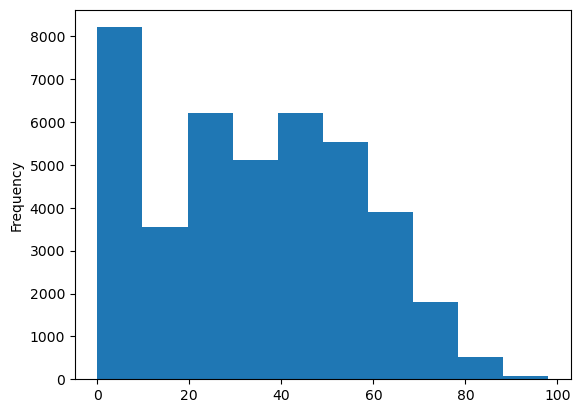

In [176]:
songs_in_minor_keys["popularity"].plot(kind = 'hist')
plt.show()

Let's look at the distribution of the popularity of the songs in major keys.

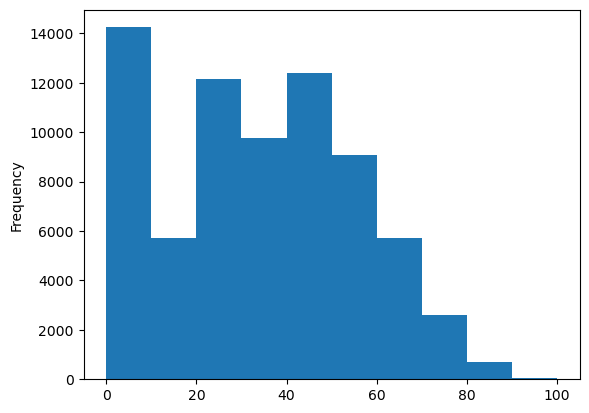

In [177]:
songs_in_major_keys["popularity"].plot(kind = 'hist')
plt.show()

These qqplots confirms that the distribution of the popularity for both major and minor key songs are not normal

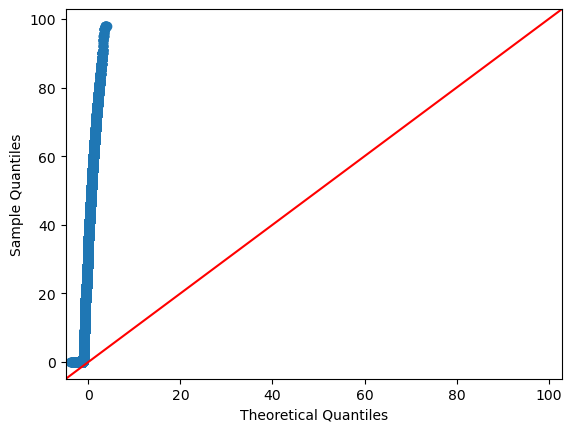

In [179]:
fig = sm.qqplot(songs_in_minor_keys['popularity'], line='45')

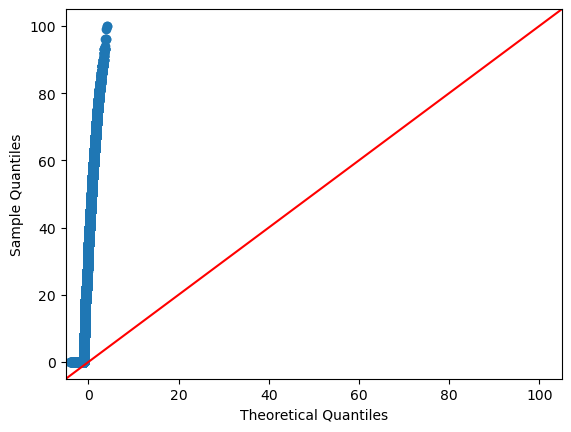

In [180]:
fig = sm.qqplot(songs_in_major_keys['popularity'], line='45')

Note that from the above results it is clear that these two populations are not normal. Hence we must use the Man Whiteny U test instead.

In [182]:
major_key_popularities = songs_in_major_keys["popularity"]
minor_key_popularities = songs_in_minor_keys["popularity"]
stat, p_val = stats.mannwhitneyu(major_key_popularities, minor_key_popularities)

In [183]:
print(p_val)

1.5939871217861402e-07


In [184]:
if p_val < 0.01:
        print("Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between the major key and minor keys.")
else:
        print("Fail to reject the null hypothesis: No statistically significant difference in the distribution of popularity between the two groups.")

Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between the major key and minor keys.


In [185]:
float(major_key_popularities.mean())

33.0724295516989

In [186]:
float(minor_key_popularities.mean())

33.76831225680934

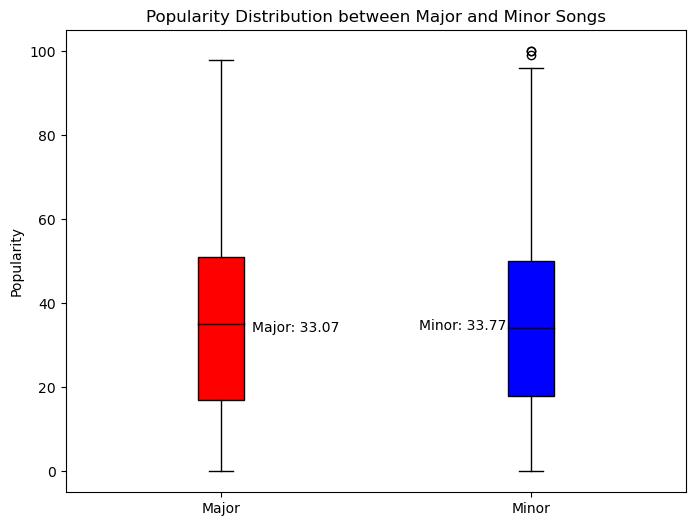

In [205]:
# Get the popularity means for explicit and nonexplicit songs
mean_major = major_key_popularities.mean()
mean_minor = minor_key_popularities.mean()

# Group songs by explicit/non-explicit status and show popularity
grouped = spotify_df.groupby('mode')['popularity']

###############################################################################
# BOXPLOT GRAPH
# Credit to: https://python-graph-gallery.com/551-student-t-test-visualization/

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=["Major", "Minor"],
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    )

# Define colors for each group
colors = ['red', 'blue']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

# Add the mean for each group
ax.text(1.1, mean_major, f'Major: {mean_major:.2f}')
ax.text(1.64, mean_minor, f'Minor: {mean_minor:.2f}')

# Add a title and axis label
ax.set_title('Popularity Distribution between Major and Minor Songs')
ax.set_ylabel('Popularity')

# Display it
plt.show()

In [187]:
explicit_songs = spotify_df[spotify_df["explicit"] == True]
non_explicit_songs = spotify_df[spotify_df["explicit"] == False]

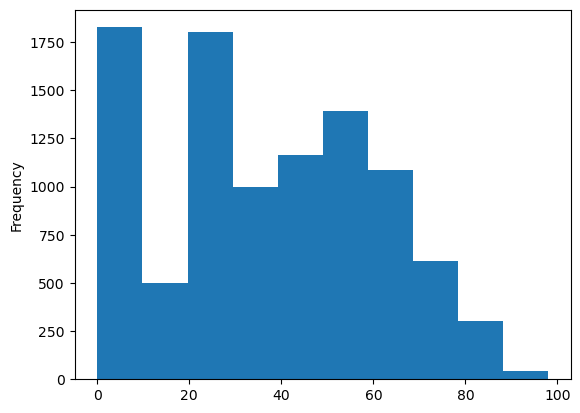

In [188]:
explicit_songs["popularity"].plot(kind = 'hist')
plt.show()

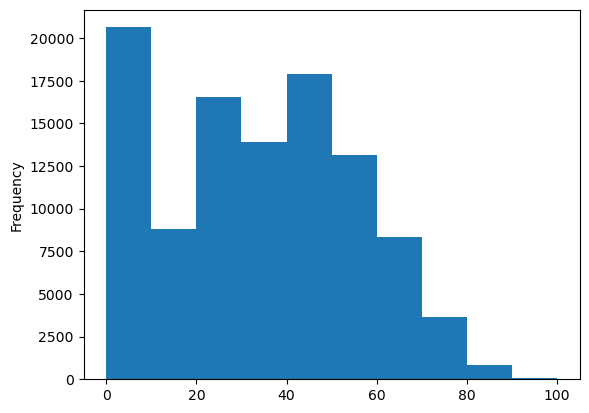

In [189]:
non_explicit_songs["popularity"].plot(kind = 'hist')
plt.show()

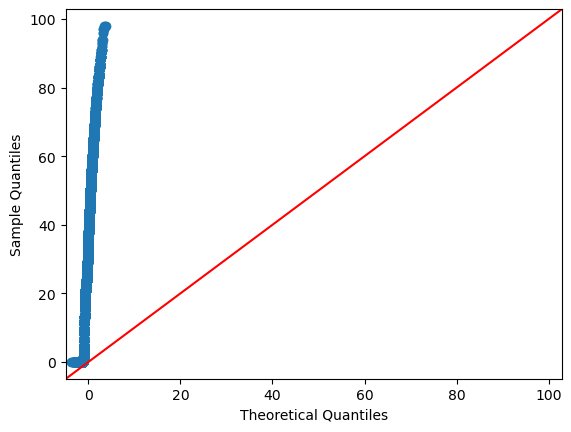

In [190]:
explicit_songs_popularity_distr = sm.qqplot(explicit_songs['popularity'], line='45')

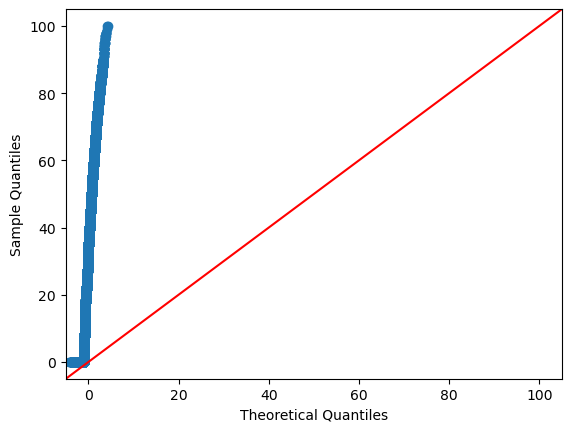

In [191]:
nonexplicit_songs_popularity_dist = sm.qqplot(non_explicit_songs['popularity'], line='45')

Note that from the above results it is clear that these two populations are not normal. Hence we must use the Man Whiteny U test instead.

In [192]:
explicit_song_popularities = explicit_songs["popularity"]
non_explicit_song_popularities = non_explicit_songs["popularity"]

In [193]:
stat_e, p_val_e = stats.mannwhitneyu(explicit_song_popularities, non_explicit_song_popularities)

In [194]:
print(p_val_e)

1.331703046386424e-41


In [195]:
if p_val_e < 0.01:
        print("Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between explicit songs and non-explicit songs.")
else:
        print("Fail to reject the null hypothesis: No statistically significant difference in the distribution of popularity between between explicit songs and non-explicit songs.")

Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between explicit songs and non-explicit songs.


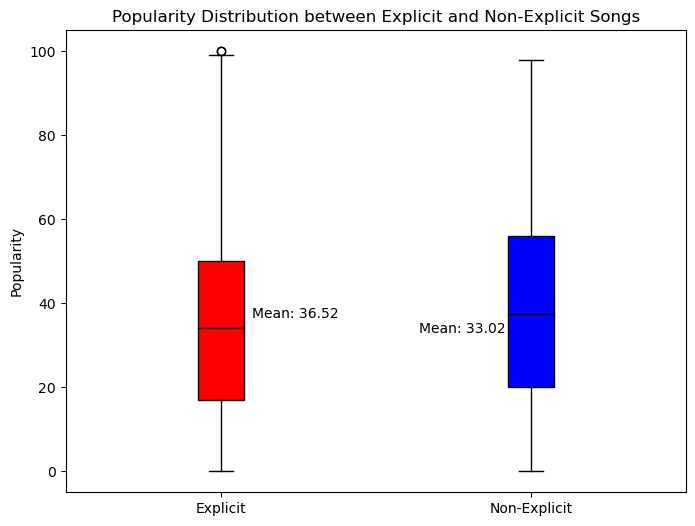

In [ ]:
# Get the popularity means for explicit and nonexplicit songs
mean_explicit = explicit_song_popularities.mean()
mean_non_explicit = non_explicit_song_popularities.mean()

# Group songs by explicit/non-explicit status and show popularity
grouped = spotify_df.groupby('explicit')['popularity']

###############################################################################
# BOXPLOT GRAPH
# Credit to: https://python-graph-gallery.com/551-student-t-test-visualization/

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=["Explicit", "Non-Explicit"],
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    )

# Define colors for each group
colors = ['red', 'blue']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

# Add the mean for each group
ax.text(1.1, mean_explicit, f'Mean: {mean_explicit:.2f}')
ax.text(1.64, mean_non_explicit, f'Mean: {mean_non_explicit:.2f}')

# Add a title and axis label
ax.set_title('Popularity Distribution between Explicit and Non-Explicit Songs')
ax.set_ylabel('Popularity')

# Display it
plt.show()